# DV Assignment 2 - P04 - Chen Han - S10202961

## Data Preparation and Cleansing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns

In [2]:
missing_values = ["n/a", "na", "N.A.", "--"]
df = pd.read_csv("Fitness Trainer Series _ April 2021.csv", na_values = missing_values)

df_backup = df.copy()

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        183 non-null    object 
 1   Branch         183 non-null    object 
 2   Age            174 non-null    float64
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          172 non-null    float64
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB
None


In [4]:
df.isnull().any()

Product          False
Branch           False
Age               True
Gender            True
Education         True
MaritalStatus     True
Usage             True
Fitness           True
Income            True
Miles             True
dtype: bool

In [5]:
#Visualise unique values in the columns
print(df["Product"].unique())
print(df["Branch"].unique())
print(df["Age"].unique())
print(df["Gender"].unique())
print(df["Education"].unique())
print(df["MaritalStatus"].unique())
print(df["Usage"].unique())
print(df["Fitness"].unique())
print(df["Income"].unique())
print(df["Miles"].unique())

['FT100' 'FT400' 'FT700']
['Jurong' 'Tampines' 'Tiong Bahru' 'Woodlands']
[18. 19. nan 20. 21. 22. 23. 24. 25. 26. 27. 28. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 43. 44. 46. 47. 50. 45. 48. 42.]
['Male' 'Female' nan]
[14. 15. nan 12. 13. 16. 18. 20. 21.]
['Single' 'P' nan 'S' 'Partnered']
[nan  2.  4.  3.  5.  6.  7.]
[ 4.  3. nan  2.  1.  5.]
[ 29562.  31836.  30699.     nan  32973.  35247.  37521.  36384.  38658.
  40932.  34110.  39795.  42069.  44343.  45480.  46617.  48891.  53439.
  43206.  52302.  51165.  50028.  54576.  68220.  55713.  60261.  67083.
  56850.  59124.  61398.  57987.  64809.  47754.  65220.  62535.  48658.
  54781.  48556.  58516.  53536.  61006.  57271.  52291.  49801.  62251.
  64741.  70966.  75946.  74701.  69721.  83416.  88396.  90886.  92131.
  77191.  52290.  85906. 103336.  99601.  89641.  95866. 104581.  95508.]
[112.  75.  66.  nan  85.  47. 141. 103.  94. 113.  38. 188.  56. 132.
 169.  64.  53. 106.  95. 212.  42. 127.  74. 170.  21. 120. 

In [6]:
#Fill null value with median values
df['Age'].fillna(df['Age'].median(),inplace = True)
df["Age"] = df["Age"].astype(int)

df['Education'].fillna(df['Education'].median(),inplace = True)
df["Education"] = df["Education"].astype(int)

#Convert S and P to Single and Partnered
df["MaritalStatus"] = df["MaritalStatus"].apply(lambda x: "Single" if x == "S" else x)
df["MaritalStatus"] = df["MaritalStatus"].apply(lambda x: "Partnered" if x == "P" else x)

df['Usage'].fillna(df['Usage'].median(),inplace = True)
df["Usage"] = df["Usage"].astype(int)

df['Fitness'].fillna(df['Fitness'].median(),inplace = True)
df["Fitness"] = df["Fitness"].astype(int)

df['Income'].fillna(df['Income'].median(),inplace = True)
df["Income"] = df["Income"].astype(int)

df['Miles'].fillna(df['Miles'].median(),inplace = True)
df["Miles"] = df["Miles"].astype(int)

#Get rid of 3 rows with null Gender and Marital status values
df = df.dropna(axis='rows')

print(df.isnull().any())
print(df.info())

Product          False
Branch           False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Branch         180 non-null    object
 2   Age            180 non-null    int32 
 3   Gender         180 non-null    object
 4   Education      180 non-null    int32 
 5   MaritalStatus  180 non-null    object
 6   Usage          180 non-null    int32 
 7   Fitness        180 non-null    int32 
 8   Income         180 non-null    int32 
 9   Miles          180 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 11.2+ KB
None


In [7]:
#Visualise unique values in the columns again
print("Product",df["Product"].unique())
print("Branch",df["Branch"].unique())
print("Age",df["Age"].unique())
print("Gender",df["Gender"].unique())
print("Education",df["Education"].unique())
print("MaritalStatus",df["MaritalStatus"].unique())
print("Usage",df["Usage"].unique())
print("Fitness",df["Fitness"].unique())
print("Income",df["Income"].unique())
print("Miles",df["Miles"].unique())

#looks clean now

Product ['FT100' 'FT400' 'FT700']
Branch ['Jurong' 'Tampines' 'Woodlands' 'Tiong Bahru']
Age [18 19 20 21 22 23 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 43
 44 46 47 50 45 48 42]
Gender ['Male' 'Female']
Education [14 15 12 13 16 18 20 21]
MaritalStatus ['Single' 'Partnered']
Usage [3 2 4 5 6 7]
Fitness [4 3 2 1 5]
Income [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


### 1. Overall sales

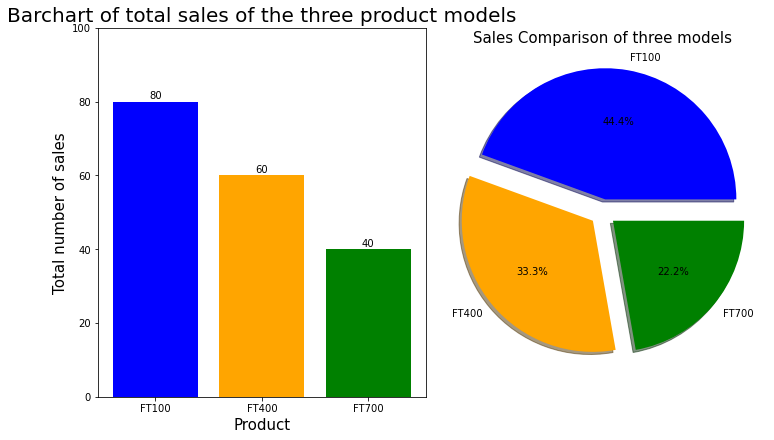

In [8]:
#Barchart of sales over three models (overall)
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sales = df.groupby("Product")["Product"].count()
ax1.bar(sales.index, sorted(sales, reverse=True), align='center', color=['blue', 'orange', 'green'])

ax1.set_title('Barchart of total sales of the three product models', fontsize=20)
ax1.set_xlabel('Product', fontsize = 15)
ax1.set_ylabel('Total number of sales', fontsize = 15)

ax1.set_ylim(bottom=0, top=max(sales) + 20)

# Display data labels
for x,y in zip(sales.index ,sales):

    label = "{:d}".format(y)

    ax1.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,3), 
                 ha='center') 

products = df["Product"].unique()
sales = df.groupby("Product")["Product"].count()


ax2.pie(sales, explode=(0.1,0.1,0.1),
      labels=products, colors=["blue", "orange", "green"], autopct='%1.1f%%', shadow=True)
ax2.set_title('Sales Comparison of three models', fontsize=15)

# Display chart
plt.show()

### 2. Branch vs Product models

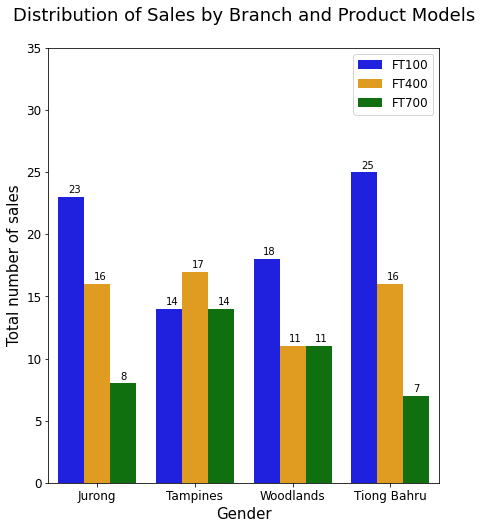

In [9]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 8))
ax1.grid(False)

ax1 = sns.countplot(x="Branch", hue="Product", palette=["blue", "orange", "green"], data=df)
ax1.tick_params(axis = 'x', labelsize = 12)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.set_ylim(bottom = 0, top = 35)
ax1.set_xlabel('Gender', fontsize = 15)
ax1.set_ylabel('Total number of sales', fontsize = 15)
ax1.set_title('Distribution of Sales by Branch and Product Models\n', fontsize = 18)
ax1.legend(fontsize = 12)

for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.3))

plt.show()


### 3. Gender vs Product models

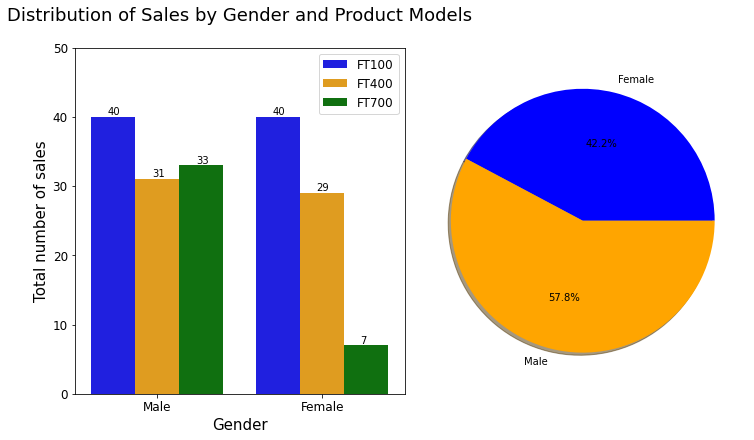

In [10]:
fig = plt.figure(figsize=(10, 6), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.countplot(x="Gender", hue="Product", palette=["blue", "orange", "green"], data=df, ax=ax1)
ax1.tick_params(axis = 'x', labelsize = 12)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.set_ylim(bottom = 0, top = 50)
ax1.set_xlabel('Gender', fontsize = 15)
ax1.set_ylabel('Total number of sales', fontsize = 15)
ax1.set_title('Distribution of Sales by Gender and Product Models\n', fontsize = 18)
ax1.legend(fontsize = 12)

for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.3))
    

gender_sales = df.groupby("Gender")["Gender"].count()
gender = gender_sales.index

ax2.pie(gender_sales, labels=gender, colors=["blue", "orange", "green"], autopct='%1.1f%%', shadow=True)

plt.show()

### 4. Age vs Product models

In [11]:
sorted_age = sorted(df["Age"].unique())
print(sorted_age)
print(len(sorted_age))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
31


In [12]:
#Since theres too many of them, I split it into three age groups
#Age group 1: 18 to 30
#Age group 2: 31 to 40
#Age group 3: 41 to 50

#Add a new column to indicate which age_group does a customer belongs to
df.loc[df["Age"] <= 30, "age_group"] = int(1)
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "age_group"] = int(2)
df.loc[(df["Age"] > 40) & (df["Age"] <= 50), 'age_group'] = int(3)

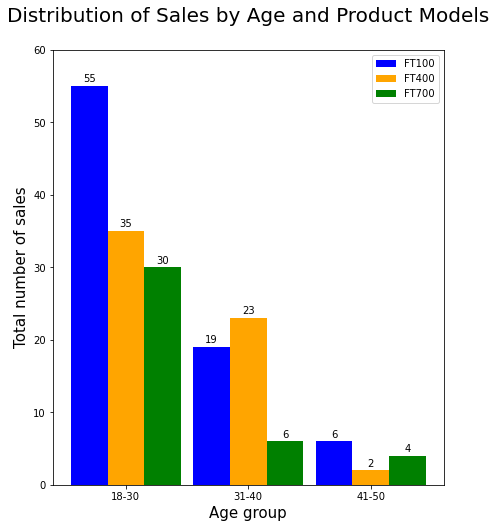

In [13]:
#grouped barchart
fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 8))


product1_temp = df[df["Product"]=="FT100"]
product1_age = product1_temp.groupby("age_group")["Product"].count()

product2_temp = df[df["Product"]=="FT400"]
product2_age = product2_temp.groupby("age_group")["Product"].count()

product3_temp = df[df["Product"]=="FT700"]
product3_age = product3_temp.groupby("age_group")["Product"].count()

# Set the label locations and width of the bars
x1_age = np.arange(len(product1_age.index))
x2_age = np.arange(len(product2_age.index))
x3_age = np.arange(len(product3_age.index))

# Set the label locations and width of the bars
x_label_age = ["18-30", "31-40", "41-50"]
x_age = np.arange(len(x_label_age))

width = 0.3

bar1 = ax2.bar(x_age - width, product1_age, width, color="blue", label='FT100')
bar2 = ax2.bar(x_age, product2_age, width, color="orange", label='FT400')
bar3 = ax2.bar(x_age + width, product3_age, width, color="green", label='FT700')

ax2.set_title('Distribution of Sales by Age and Product Models\n', fontsize = 20)
ax2.set_ylabel('Total number of sales', fontsize = 15)
ax2.set_xlabel('Age group', fontsize = 15)
ax2.set_xticks(x_age)
ax2.set_xticklabels(x_label_age)
ax2.set_ylim(bottom = 0, top = 60)
ax2.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars, ax):
    ax.grid(False)
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1, ax2)
autolabel(bar2, ax2)
autolabel(bar3, ax2)

# Display plot
plt.show()

### 5. Education vs Product models

In [14]:
print(sorted(df["Education"].unique()))

[12, 13, 14, 15, 16, 18, 20, 21]


In [15]:
#Since theres too many of them, I split it into three education groups
#Edu group 1: 12 to 14
#Edu group 2: 15 to 18
#Edu group 3: 19 to 21

#Add a new column to indicate which age_group does a customer belongs to
df.loc[df["Education"] <= 14, "edu_group"] = int(1)
df.loc[(df["Education"] > 14) & (df["Education"] <= 18), "edu_group"] = int(2)
df.loc[(df["Education"] > 18), 'edu_group'] = int(3)

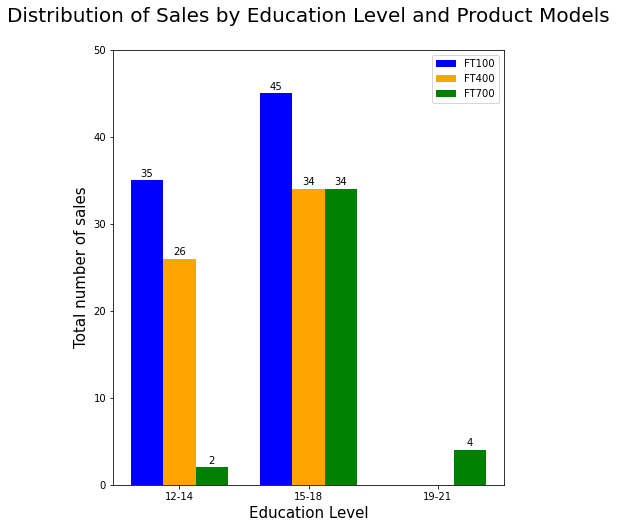

In [16]:
#grouped barchart
fig, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize=(7, 8))


product1_temp = df[df["Product"]=="FT100"]
product1_edu = product1_temp.groupby("edu_group")["Product"].count()

product2_temp = df[df["Product"]=="FT400"]
product2_edu = product2_temp.groupby("edu_group")["Product"].count()

product3_temp = df[df["Product"]=="FT700"]
product3_edu = product3_temp.groupby("edu_group")["Product"].count()

# Set the label locations and width of the bars
x_label_edu = ["12-14", "15-18", "19-21"]
x_edu = np.arange(len(x_label_edu))

x1_edu = np.arange(len(product1_edu.index))
x2_edu = np.arange(len(product2_edu.index))
x3_edu = np.arange(len(product3_edu.index))

width = 0.25

bar1 = ax3.bar(x1_edu - width, product1_edu, width, color="blue", label='FT100')
bar2 = ax3.bar(x2_edu, product2_edu, width, color="orange", label='FT400')
bar3 = ax3.bar(x3_edu + width, product3_edu, width, color="green", label='FT700')

ax3.set_title('Distribution of Sales by Education Level and Product Models\n', fontsize = 20)
ax3.set_ylabel('Total number of sales', fontsize = 15)
ax3.set_xlabel('Education Level', fontsize = 15)
ax3.set_xticks(x_edu)
ax3.set_xticklabels(x_label_edu)
ax3.set_ylim(bottom = 0, top = 50)
ax3.legend()

autolabel(bar1, ax3)
autolabel(bar2, ax3)
autolabel(bar3, ax3)

# Display plot
plt.show()

### 6. MaritalStatus vs Product models

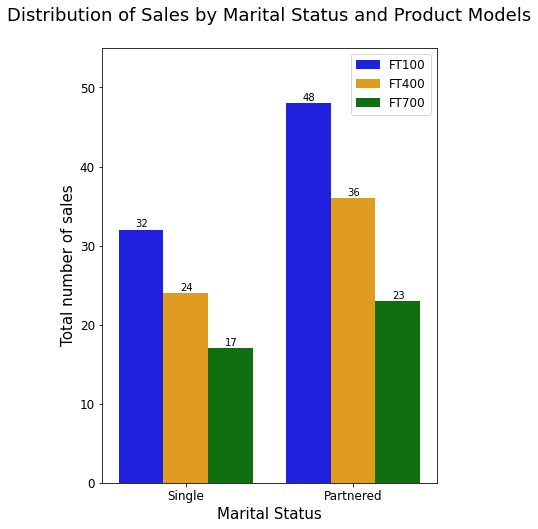

In [17]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 8))
ax1.grid(False)

ax1 = sns.countplot(x="MaritalStatus", hue="Product", palette=["blue", "orange", "green"], data=df)
ax1.tick_params(axis = 'x', labelsize = 12)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.set_ylim(bottom = 0, top = 55)
ax1.set_xlabel('Marital Status', fontsize = 15)
ax1.set_ylabel('Total number of sales', fontsize = 15)
ax1.set_title('Distribution of Sales by Marital Status and Product Models\n', fontsize = 18)
ax1.legend(fontsize = 12)

for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.3))
    
plt.show()

### 7. Income vs Product models

In [18]:
income = sorted(df["Income"].unique())
print(max(income), min(income))

104581 29562


In [19]:
#Since theres too many of them, I split it into three income groups
#Low income: below 50000
#Mid income: 50000 - 75000
#High income: above 75000

#Add a new column to indicate which age_group does a customer belongs to
df.loc[df["Income"] <= 50000, "income_group"] = int(1)
df.loc[(df["Income"] > 50000) & (df["Income"] <= 75000), "income_group"] = int(2)
df.loc[(df["Income"] > 75000), 'income_group'] = int(3)

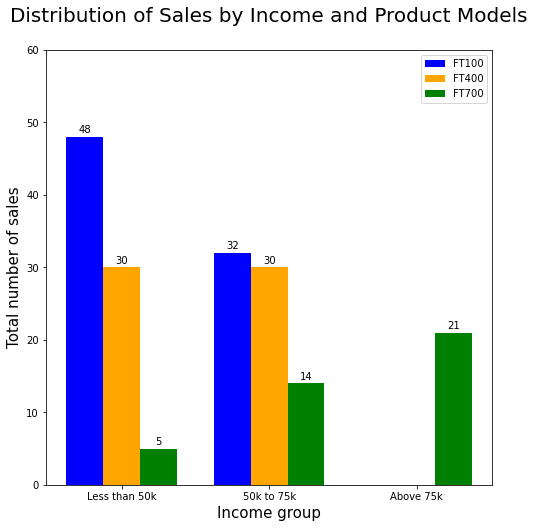

In [20]:
#grouped barchart
fig, ax4 = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 8))


product1_temp = df[df["Product"]=="FT100"]
product1_inc = product1_temp.groupby("income_group")["Product"].count()

product2_temp = df[df["Product"]=="FT400"]
product2_inc = product2_temp.groupby("income_group")["Product"].count()

product3_temp = df[df["Product"]=="FT700"]
product3_inc = product3_temp.groupby("income_group")["Product"].count()

# Set the label locations and width of the bars
x_label_inc = ["Less than 50k", "50k to 75k", "Above 75k"]
x_inc = np.arange(len(x_label_inc))
x1_inc = np.arange(len(product1_inc.index))
x2_inc = np.arange(len(product2_inc.index))
x3_inc = np.arange(len(product3_inc.index))

width = 0.25

bar1 = ax4.bar(x1_inc - width, product1_inc, width, color="blue", label='FT100')
bar2 = ax4.bar(x2_inc, product2_inc, width, color="orange", label='FT400')
bar3 = ax4.bar(x3_inc + width, product3_inc, width, color="green", label='FT700')

ax4.set_title('Distribution of Sales by Income and Product Models\n', fontsize = 20)
ax4.set_ylabel('Total number of sales', fontsize = 15)
ax4.set_xlabel('Income group', fontsize = 15)
ax4.set_xticks(x_inc)
ax4.set_xticklabels(x_label_inc)
ax4.set_ylim(bottom = 0, top = 60)
ax4.legend()


autolabel(bar1, ax4)
autolabel(bar2, ax4)
autolabel(bar3, ax4)

# Display plot
plt.show()

### 8. Usage vs Product models

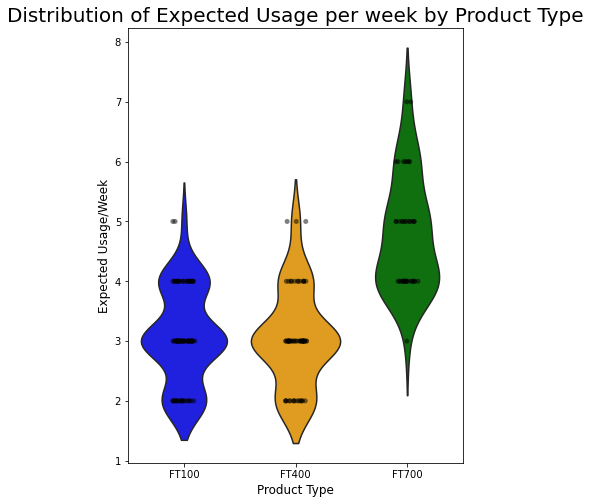

In [21]:

fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 8))

sns.violinplot(x='Product', y='Usage', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax2)

# Overlay swarm plot on violin plot
sns.stripplot(x='Product', y='Usage', data=df, color='k', alpha=.5, ax=ax2) 

ax2.set_title('Distribution of Expected Usage per week by Product Type', fontsize=20)
ax2.set_xlabel('Product Type', fontsize = 12)
ax2.set_ylabel('Expected Usage/Week', fontsize = 12)

plt.show()

### 9. Fitness vs Product models

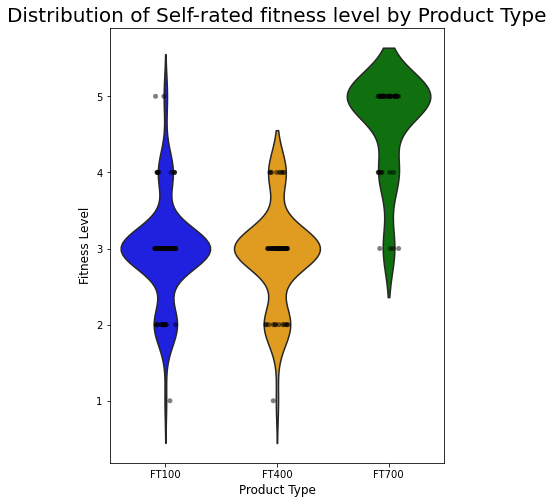

In [22]:
# Distribution of customer fitness level by product types
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 8))

# Create violin plot with inner boxplots removed
sns.violinplot(x='Product', y='Fitness', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax1)

# Overlay swarm plot on violin plot
sns.stripplot(x='Product', y='Fitness', data=df, color='k', alpha=.5, ax=ax1) 

ax1.set_title('Distribution of Self-rated fitness level by Product Type', fontsize=20)
ax1.set_xlabel('Product Type', fontsize = 12)
ax1.set_ylabel('Fitness Level', fontsize = 12)

plt.show()

### 10. Miles vs Product models

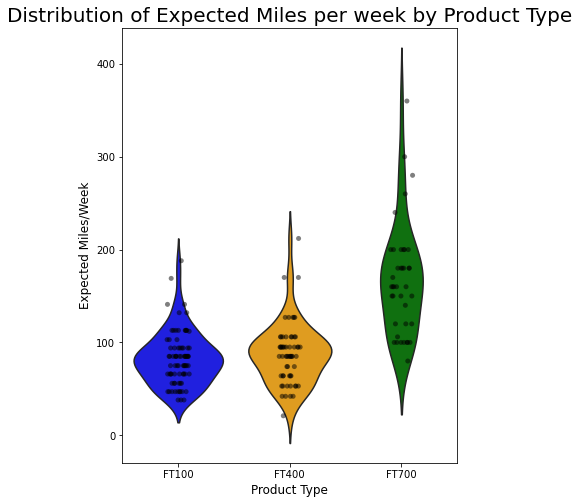

In [23]:

fig, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 8))

sns.violinplot(x='Product', y='Miles', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax3)

# Overlay swarm plot on violin plot
sns.stripplot(x='Product', y='Miles', data=df, color='k', alpha=.5, ax=ax3) 

ax3.set_title('Distribution of Expected Miles per week by Product Type', fontsize=20)
ax3.set_xlabel('Product Type', fontsize = 12)
ax3.set_ylabel('Expected Miles/Week', fontsize = 12)

plt.show()

### 11. Fitness vs Miles

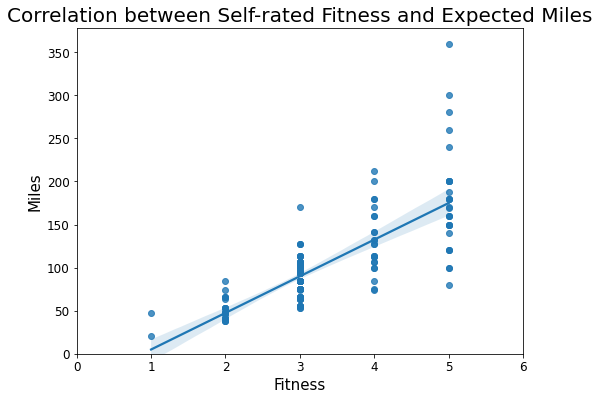

In [24]:

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 6))

ax = sns.regplot(x='Fitness', y='Miles', data=df) # axes plot
plt.title('Correlation between Self-rated Fitness and Expected Miles', fontsize=20)
plt.xlabel('Fitness', fontsize=15)
plt.ylabel('Miles', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)
plt.xlim(0, 6, None)
plt.show()

# DASHBOARDS

## Dashboard 1: Product Model Sales Evaluation

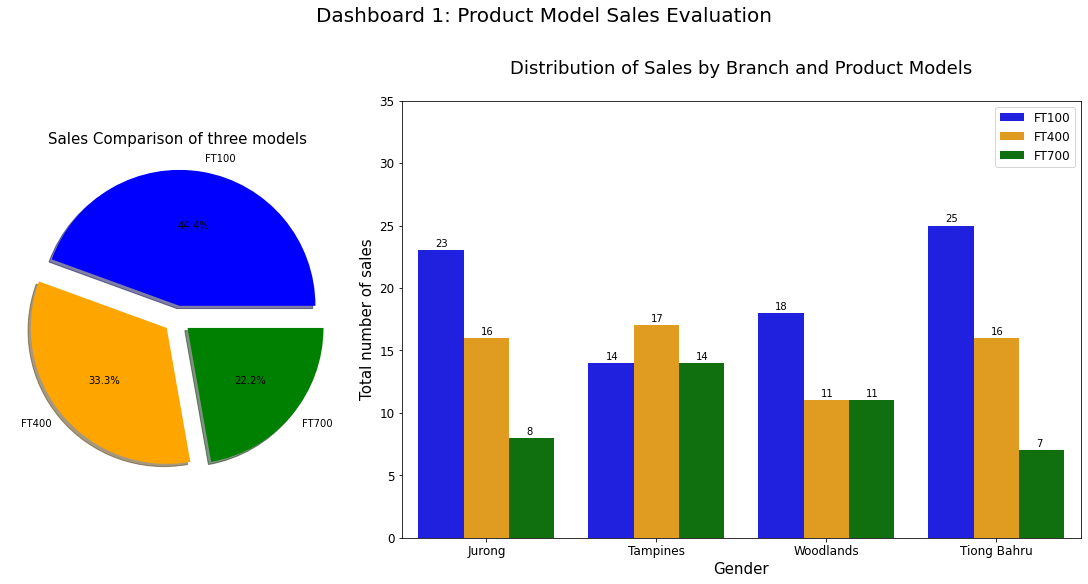

In [25]:
# Dashboard 1: Product model sales evaluation

fig = plt.figure(figsize=(15,8), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=1, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

products = df["Product"].unique()
sales = df.groupby("Product")["Product"].count()
ax1.pie(sales, colors=["blue", "orange", "green"],explode=(0.1,0.1,0.1),
        labels=products, autopct='%1.1f%%', shadow=True)

ax1.set_title('Sales Comparison of three models', fontsize=15)


sns.countplot(x="Branch", hue="Product", palette=["blue", "orange", "green"], data=df, ax=ax2)
ax2.tick_params(axis = 'x', labelsize = 12)
ax2.tick_params(axis = 'y', labelsize = 12)
ax2.set_ylim(bottom = 0, top = 35)
ax2.set_xlabel('Gender', fontsize = 15)
ax2.set_ylabel('Total number of sales', fontsize = 15)
ax2.set_title('Distribution of Sales by Branch and Product Models\n', fontsize = 18)
ax2.legend(fontsize = 12)

for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+0.3))


fig.suptitle("Dashboard 1: Product Model Sales Evaluation\n", fontsize=20)


# Display the plot
plt.show()

## Dashboard 2: Customer Chacteristic vs Sales of the three models

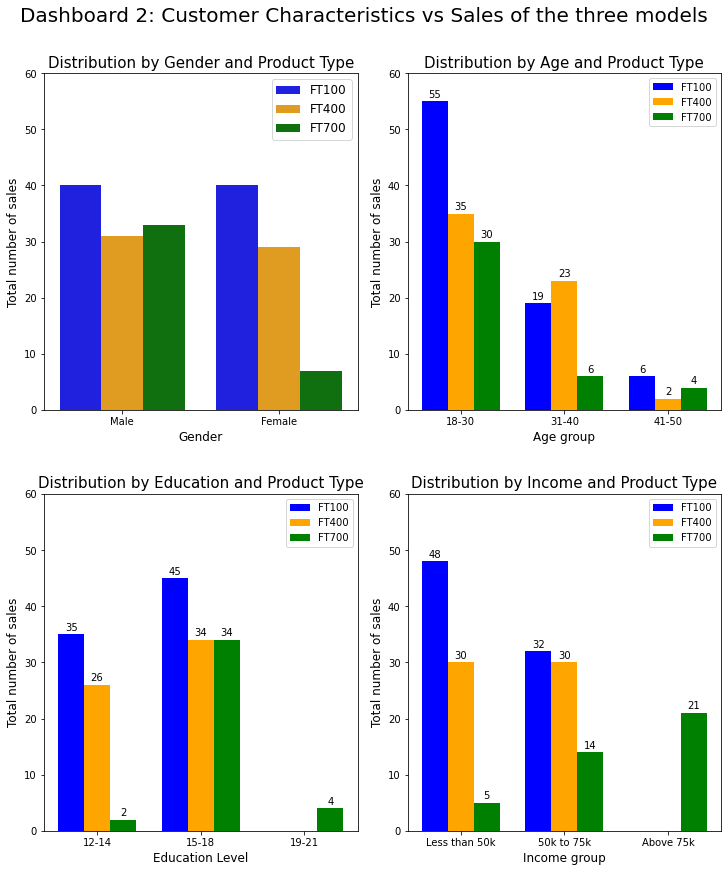

In [26]:
# Dashboard 2: Customer Chacteristic vs Sales of the three models

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(10,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)

# Define subplots and their corresponding positions

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, -1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, -1])

ax1.grid(False)

# Gender 
sns.countplot(x="Gender", hue="Product", data=df, palette=["blue", "orange", "green"], ax=ax1)
ax1.set_ylim(bottom = 0, top = 60)
ax1.set_xlabel('Gender', fontsize = 12)
ax1.set_ylabel('Total number of sales', fontsize = 12)
ax1.set_title('\nDistribution by Gender and Product Type', fontsize = 15)
ax1.legend(fontsize = 12)

# Age
ax2_bar1 = ax2.bar(x_age - width, product1_age, width, color="blue", label='FT100')
ax2_bar2 = ax2.bar(x_age, product2_age, width, color="orange", label='FT400')
ax2_bar3 = ax2.bar(x_age + width, product3_age, width, color="green", label='FT700')

ax2.set_title('\nDistribution by Age and Product Type', fontsize = 15)
ax2.set_ylabel('Total number of sales', fontsize = 12)
ax2.set_xlabel('Age group', fontsize = 12)
ax2.set_xticks(x_age)
ax2.set_xticklabels(x_label_age)
ax2.set_ylim(bottom = 0, top = 60)
ax2.legend()

autolabel(ax2_bar1, ax2)
autolabel(ax2_bar2, ax2)
autolabel(ax2_bar3, ax2)

# Education Level
ax3_bar1 = ax3.bar(x1_edu - width, product1_edu, width, color="blue", label='FT100')
ax3_bar2 = ax3.bar(x2_edu, product2_edu, width, color="orange", label='FT400')
ax3_bar3 = ax3.bar(x3_edu + width, product3_edu, width, color="green", label='FT700')

ax3.set_title('\nDistribution by Education and Product Type', fontsize = 15)
ax3.set_ylabel('Total number of sales', fontsize = 12)
ax3.set_xlabel('Education Level', fontsize = 12)
ax3.set_xticks(x_edu)
ax3.set_xticklabels(x_label_edu)
ax3.set_ylim(bottom = 0, top = 60)
ax3.legend()

autolabel(ax3_bar1, ax3)
autolabel(ax3_bar2, ax3)
autolabel(ax3_bar3, ax3)

# Income

ax4_bar1 = ax4.bar(x1_inc - width, product1_inc, width, color="blue", label='FT100')
ax4_bar2 = ax4.bar(x2_inc, product2_inc, width, color="orange", label='FT400')
ax4_bar3 = ax4.bar(x3_inc + width, product3_inc, width, color="green", label='FT700')

ax4.set_title('\nDistribution by Income and Product Type', fontsize = 15)
ax4.set_ylabel('Total number of sales', fontsize = 12)
ax4.set_xlabel('Income group', fontsize = 12)
ax4.set_xticks(x_inc)
ax4.set_xticklabels(x_label_inc)
ax4.set_ylim(bottom = 0, top = 60)
ax4.legend()

autolabel(ax4_bar1, ax4)
autolabel(ax4_bar2, ax4)
autolabel(ax4_bar3, ax4)



# Set title of dashboard
fig.suptitle("Dashboard 2: Customer Characteristics vs Sales of the three models", fontsize=20)

# Display plot
plt.show()

## Dashboard 3: Customer Usage Goal and Expectation 

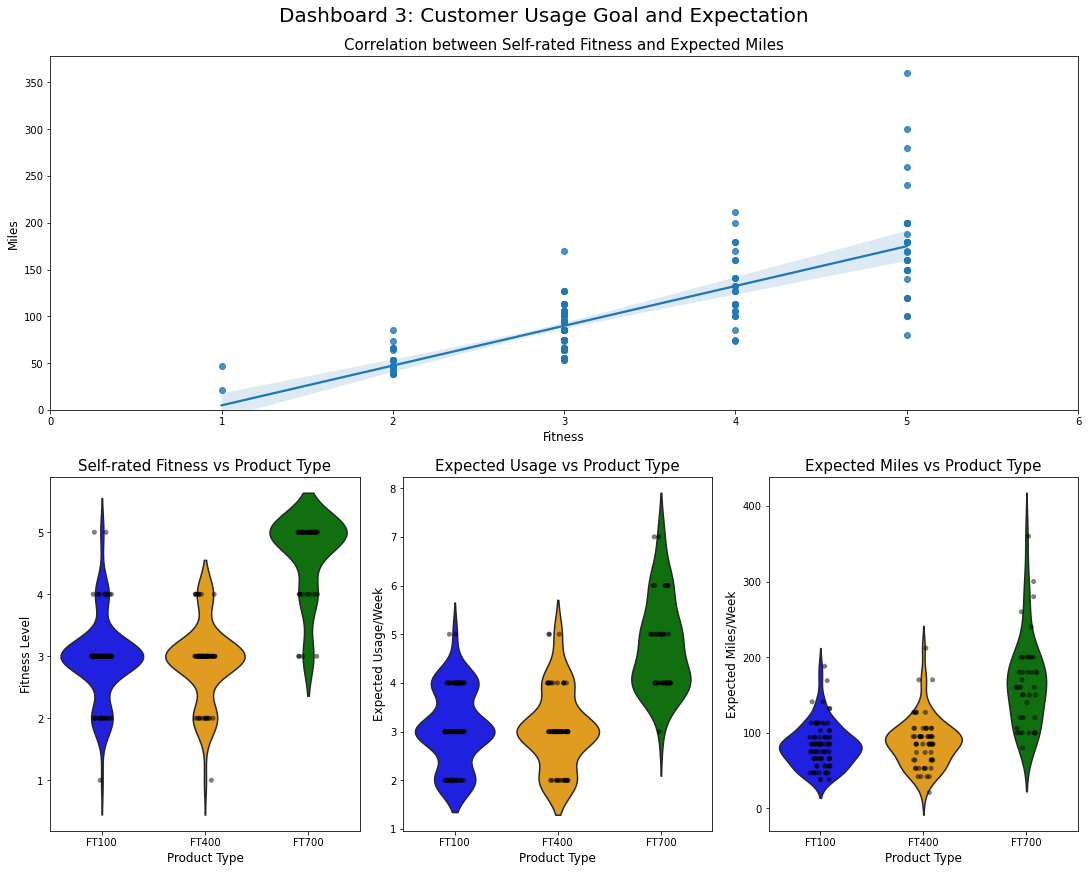

In [27]:
# Dashboard 3: Customer Usage Goal and Expectation

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,12), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=3, figure=fig)

# Define subplots and their corresponding positions
ax4 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, -1])


#Correlation between Fitness and Miles
sns.regplot(x='Fitness', y='Miles', data=df, ax=ax4) # axes plot
ax4.set_title('Correlation between Self-rated Fitness and Expected Miles', fontsize=15)
ax4.set_xlabel('Fitness', fontsize=12)
ax4.set_ylabel('Miles', fontsize=12)
ax4.set_ylim(0, None)
ax4.set_xlim(0, 6, None)


# Fitness 
sns.violinplot(x='Product', y='Fitness', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax1)
sns.stripplot(x='Product', y='Fitness', data=df, color='k', alpha=.5, ax=ax1) 

ax1.set_title('Self-rated Fitness vs Product Type', fontsize=15)
ax1.set_xlabel('Product Type', fontsize = 12)
ax1.set_ylabel('Fitness Level', fontsize = 12)

# Usage
sns.violinplot(x='Product', y='Usage', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax2)
sns.stripplot(x='Product', y='Usage', data=df, color='k', alpha=.5, ax=ax2) 

ax2.set_title('Expected Usage vs Product Type', fontsize=15)
ax2.set_xlabel('Product Type', fontsize = 12)
ax2.set_ylabel('Expected Usage/Week', fontsize = 12)

# Miles
sns.violinplot(x='Product', y='Miles', data=df, palette=["blue", "orange", "green"], inner=None, ax=ax3)
sns.stripplot(x='Product', y='Miles', data=df, color='k', alpha=.5, ax=ax3) 

ax3.set_title('Expected Miles vs Product Type', fontsize=15)
ax3.set_xlabel('Product Type', fontsize = 12)
ax3.set_ylabel('Expected Miles/Week', fontsize = 12)


# Set title of dashboard
fig.suptitle("Dashboard 3: Customer Usage Goal and Expectation", fontsize=20)

# Display plot
plt.show()